In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
%precision 8


plt.style.use('ggplot')

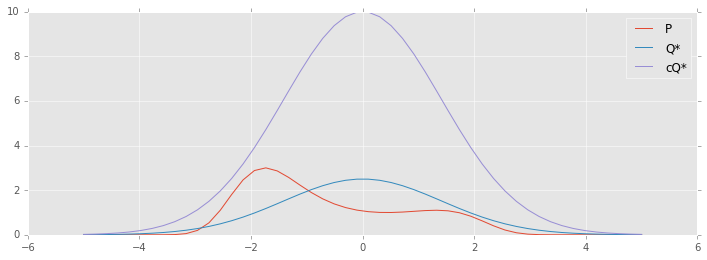

In [86]:
def P_star(x):
    return np.exp(0.4*(x-0.4)**2-0.08*x**4)

def Q_star(x):
    return 2.5*np.exp(-x**2/4.0)


x = np.linspace(-5, 5)



plt.figure(figsize=(12,4))
plt.plot(x, P_star(x), label='P')
plt.plot(x, Q_star(x), label='Q*')
plt.plot(x, 4*Q_star(x), label ='cQ*')
plt.legend(loc ='best')

The expectation value of phi in the probability density, $P(x)$ is about -1.3186311907073391.

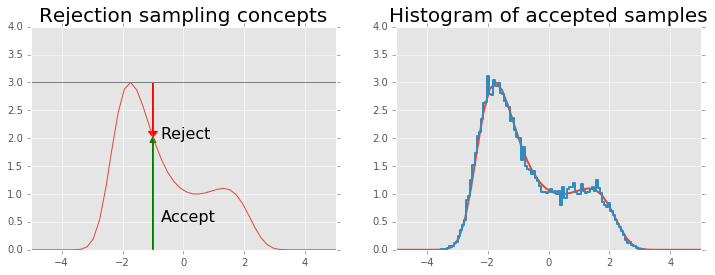

In [73]:


x = np.linspace(-5, 5)

def f(x):
    return np.exp(0.4*(x-0.4)**2-0.08*x**4)

upper = f(-1.75233)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, f(x))
plt.axhline(upper, color='grey')

px = -1.0

plt.arrow(px,0,0,f(px)-0.1, linewidth=1,
          head_width=0.2, head_length=0.1, fc='g', ec='g')

plt.arrow(px,upper,0,-(upper-f(px)-0.1), linewidth=1,
          head_width=0.3, head_length=0.1, fc='r', ec='r')
    
plt.text(px+.25, 2, 'Reject', fontsize=16)
plt.text(px+.25, 0.5, 'Accept', fontsize=16)

plt.axis([-5,5,0,4])

plt.title('Rejection sampling concepts', fontsize=20)


plt.subplot(122)

n = 100000


u = np.random.uniform(-5, 5, n)


r = np.random.uniform(0, upper, n)


v = u[r < f(u)]


    
plt.plot(x, f(x), linewidth=2)

    


factor = 7.85218 # Integrated value of f(x) from -5 to 5. 

hist, bin_edges = np.histogram(v, bins=100, normed=True)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.

plt.step(bin_centers, factor*hist, linewidth=2)



plt.axis([-5,5,0,4])

plt.title('Histogram of accepted samples', fontsize=20);

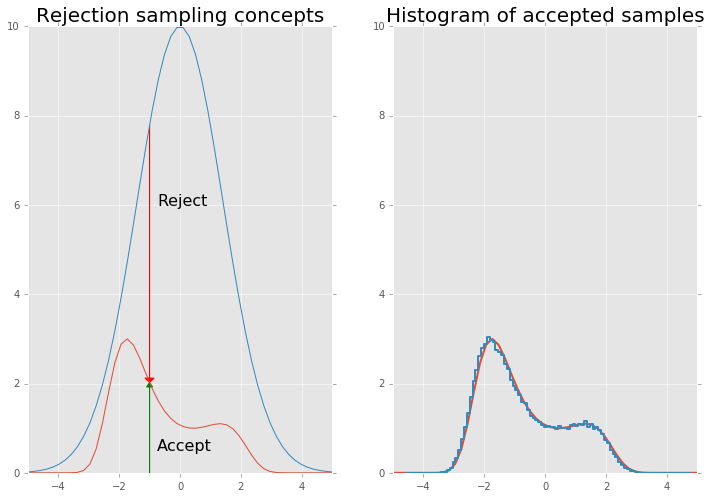

In [84]:

x = np.linspace(-5, 5)

def f(x):
    return np.exp(0.4*(x-0.4)**2-0.08*x**4)


plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.plot(x, f(x))
plt.plot(x, 4*Q_star(x))


px = -1.0

plt.arrow(px,0,0,f(px)-0.1, linewidth=1,
          head_width=0.2, head_length=0.1, fc='g', ec='g')

plt.arrow(px,4*Q_star(-1),0,-(4*Q_star(-1)-f(px)-0.1), linewidth=1,
          head_width=0.3, head_length=0.1, fc='r', ec='r')
    
plt.text(px+.25, 6, 'Reject', fontsize=16)
plt.text(px+.25, 0.5, 'Accept', fontsize=16)

plt.axis([-5,5,0,10])

plt.title('Rejection sampling concepts', fontsize=20)


plt.subplot(122)

N = 100000

def cQ_samples(N):
    sample = []
    x = np.random.uniform(-5,5,N)
    for i in range(N):
        if np.random.uniform(0,10) <= 4.0*Q_star(x[i]) :
            sample = sample +[x[i]]
    return len(sample), sample

s = cQ_samples(N)[1]

for i in range(len(s)):
    if np.random.uniform(0,4.0*Q_star(s[i])) <= P_star(s[i]) :
        sample = sample +[s[i]]

v = sample
            
plt.plot(x, f(x), linewidth=2)



factor = 7.85218 # Integrated value of f(x) from -5 to 5. 

hist, bin_edges = np.histogram(v, bins=100, normed=True)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0

plt.step(bin_centers, factor*hist, linewidth=2)



plt.axis([-5,5,0,10])

plt.title('Histogram of accepted samples', fontsize=20);



In [70]:
len(s),len(v)

(35331, 7783)

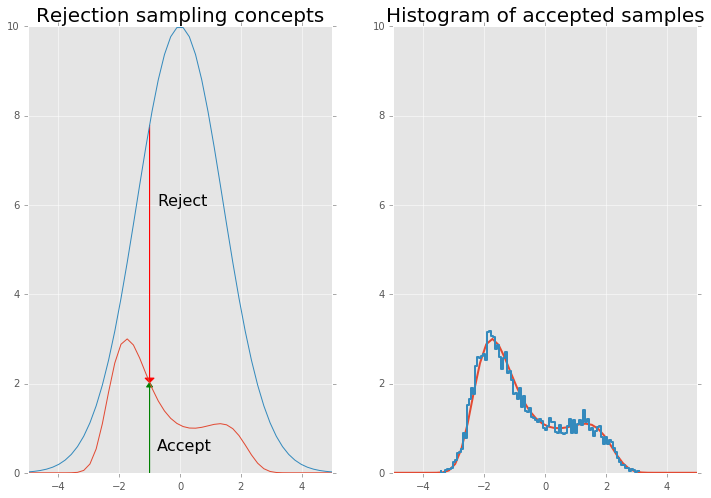

In [90]:
x = np.linspace(-5, 5)



plt.figure(figsize=(12,8))
plt.subplot(121)
plt.plot(x, P_star(x))
plt.plot(x, 4*Q_star(x))


x_arrow = -1.0

plt.arrow(x_arrow,0,0,P_star(x_arrow)-0.1, linewidth=1,
          head_width=0.2, head_length=0.1, fc='g', ec='g')

plt.arrow(x_arrow,4*Q_star(-1),0,-(4*Q_star(-1)-P_star(x_arrow)-0.1), linewidth=1,
          head_width=0.3, head_length=0.1, fc='r', ec='r')

plt.text(x_arrow+.25, 6, 'Reject', fontsize=16)
plt.text(x_arrow+.25, 0.5, 'Accept', fontsize=16)

plt.axis([-5,5,0,10])

plt.title('Rejection sampling concepts', fontsize=20)


plt.subplot(122)


def cQ_samples(N):
    sample = []
    x = np.random.uniform(-5,5,N)
    for i in range(N):
        if np.random.uniform(0,10) <= 4.0*Q_star(x[i]) :
            sample = sample +[x[i]]
    return len(sample), sample


def accept_samples(N):
    s = cQ_samples(N)[1]
    sample = []
    for i in range(len(s)):
        if np.random.uniform(0,4.0*Q_star(s[i])) <= P_star(s[i]) :
            sample = sample +[s[i]]
    return len(sample), sample

plt.plot(x, P_star(x), linewidth=2)


N = 100000

factor = 7.85218 # Integrated value of P_star(x) from -5 to 5.

hist, bin_edges = np.histogram(accept_samples(N)[1], bins=100, normed=True)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0

plt.step(bin_centers, factor*hist, linewidth=2)



plt.axis([-5,5,0,10])

plt.title('Histogram of accepted samples', fontsize=20);